#  Titanic Proyect

# Importing Libraries

In [5]:
import numpy as np # linear algebra                                                                                                           
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)                                                                        
import matplotlib.pyplot as plt # this is used for the plot the graph                                                                         
import seaborn as sns # used for plot interactive graph.                                                                                      
from pandas_profiling import ProfileReport
from scipy import stats

%matplotlib inline  

# Data Access

In [6]:
df = pd.read_csv("../train.csv", sep=",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Analysis

* Descriptive analysis
* GroupBy: basic of grouping data using GroupBy, and how this can help to transform our data set
* ANOVA: the analysis of variance, a statistical method in which the variation in a set of observations is divided into distinct components
* Correlation: the correlation between different variables
* Advance correlation statistical methods: Pearson, correlation heatmaps: various correlations statistical methods namely, Pearson correlation, and correlation heatmaps.

## Descriptive analysis

In [8]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Connaghton, Mr. Michael",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Connaghton, Mr. Michael",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
drive_sex_counts = df['Sex'].value_counts().to_frame()
drive_sex_counts.rename(columns={'Sex': 'counts'}, inplace=True)
drive_sex_counts

,counts
male,577
female,314


In [11]:
drive_sex_counts.index.name = 'Sex'
drive_sex_counts

,counts
Sex,
male,577
female,314


In [12]:
# For categorical variables, we can show the values and their frequencies. For example:

col='Embarked'

#em=df[col].value_counts()
#em = em.rename(columns={col:"counts"},inplace=True)
#em.index.name = col

#OR
em=df[col].value_counts().reset_index()
em=em.rename(columns={col:'count','index':col})
em=em.sort_values(col)

em

,Embarked,count
1,C,168
2,Q,77
0,S,644


In [13]:
ProfileReport(df)


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


<Figure size 800x550 with 0 Axes>

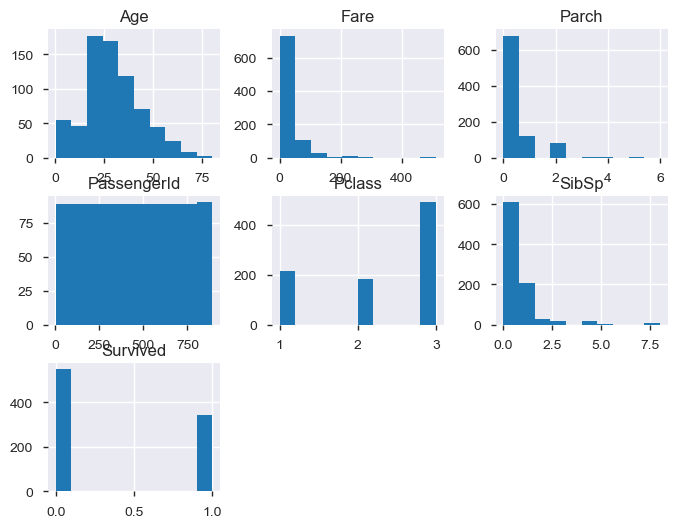

<Figure size 800x550 with 0 Axes>

In [176]:
df.hist(figsize=(8,6))
plt.figure()

### PLOTS

* We can make box plots: 
- Box which size is call interquartile range: 
- It is between 25th percentile and 75th percentile. It shows median.
- We can see lower and upper extremes. Which are calculated as 1.5 times the interquartile range above the 75th percentile and as 1.5 times the interquartile range below the 25th percentile.
- We can see outliers

* Scatter plots



### Circle Plots

Allows you to see the percentage for the possible values that a categorical variable can take.

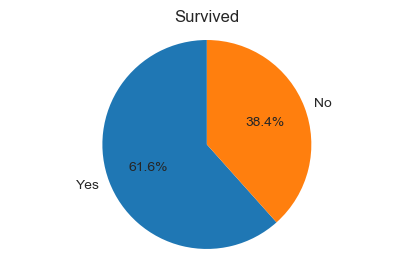

In [18]:
col = "Survived"
grouped = df[col].value_counts().reset_index() # def[col] takes the columns Survived, value_counts() 
    #counts the no of each value
    #grouped is a matrix: rows: 0,1. Three Columns: 0 or 1, index and survived.
grouped = grouped.rename(columns = {col : "count", "index" : col}) # (col = Survived) so rename columns: Survived to 
#count, and index to Survived 

# The elements can be accessed as a matrix: list["column"][raw].
# So, the number of persons who did not survived is grouped['count'][0]

labels = 'Yes', 'No'
sizes = grouped['count']

fig1, ax1 = plt.subplots(figsize=(5,3))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Survived")
plt.show()

### Box Plots

Box plots can be used to see if a categorical variable is a good predictor of a continous variable. 
As a pedagogical example, the following box plots shows the age distribution according the PClass variable.
The distributions on the left are for non-survivors, and the distributions on the right are for survivors.
For non-survivors distributions, since PClass=1 distribution is a little bit separated from the other classes, the Pclass variable would be a good predictor for the age.

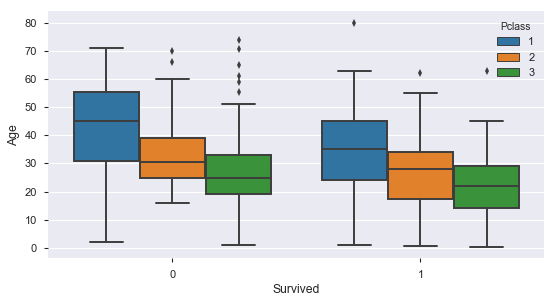

In [20]:
plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.boxplot(y='Age', x='Survived', hue="Pclass", data=df)
plt.show()

### Violin Plots

A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). In this case a violin plot shows the presence of different peaks, their position and relative amplitude. <br>

We are going to use the same example than the one used in the box plot. You can see the same data used in the box plot on the left plot of the following violin distributions. You can see there the distribution for each Pclass values for non-survivors and survivors. Here we can see that the peak for survivor is almost the same for the three classes.

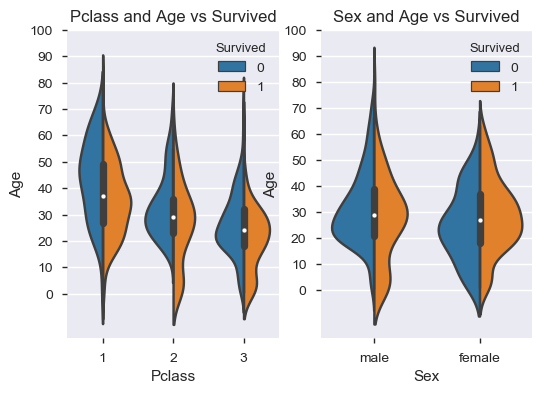

In [21]:
f,ax=plt.subplots(1,2,figsize=(6,4))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Bar Plots

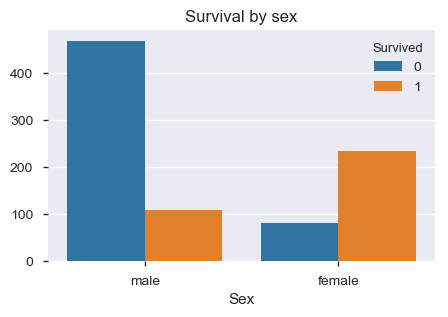

In [22]:
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax)
ax.set_title('Survival by sex')
ax.set_ylabel('')
plt.show()

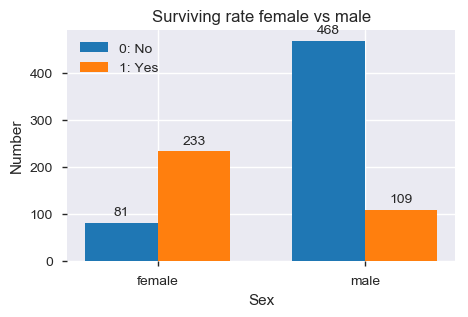

In [23]:
x=df
d1=x[x['Survived']==0] # Selected data of persons who did not survived
d2=x[x['Survived']==1] # Selected data of persons who did survived

col='Sex'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
# An additional column is included into the data
# "percent" and it is filled by the calculation inside apply function
v1=v1.sort_values(col)

v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

labels = 'female', 'male'
sizes1 = v1['count']
sizes2 = v2['count']
xl = np.arange(len(labels))  # the label locations (its an arrange=[0,1])
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(5,3))
rects1 = ax.bar(xl - width/2, sizes1, width, label='0: No')
rects2 = ax.bar(xl + width/2, sizes2, width, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Sex')
ax.set_title('Surviving rate female vs male')
ax.set_xticks(xl)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

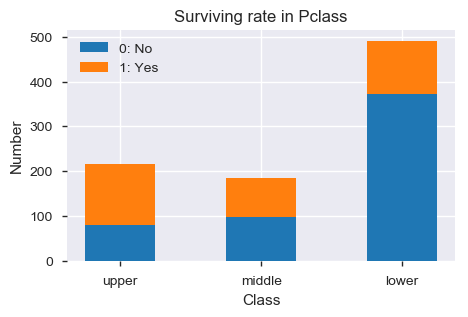

In [182]:
col='Pclass'
#v1 -> Not survived
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
v1=v1.sort_values(col)
#v2 -> Survived
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

labels = 'upper', 'middle', 'lower'
xl = np.arange(len(labels))  # the label locations (its an arrange=[0,1])
width = 0.5  # the width of the bars
sizes1 = v1['count']
sizes2 = v2['count']

fig, ax = plt.subplots(figsize=(5,3))
rects1 = ax.bar(xl, sizes1, width, label='0: No')
rects2 = ax.bar(xl, sizes2, width, bottom=sizes1, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Class')
ax.set_title('Surviving rate in Pclass')
ax.set_xticks(xl)
ax.set_xticklabels(labels)

ax.legend()

#autolabel(rects1+autolabel(rects2))

#ax.annotate('{}'.format(height), xy=(rects2.get_x() + rects2.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

### Histograms

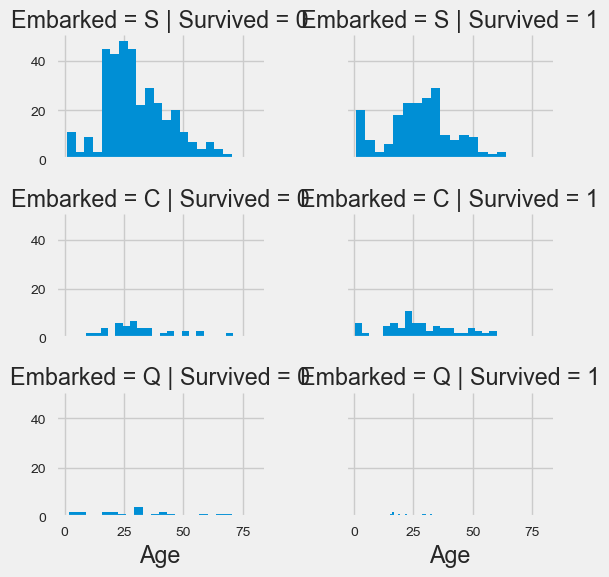

In [24]:
plt.style.use('fivethirtyeight')
grid = sns.FacetGrid(df, col='Survived', row='Embarked', height=2, aspect=1.5)
grid.map(plt.hist, 'Age', bins=20)

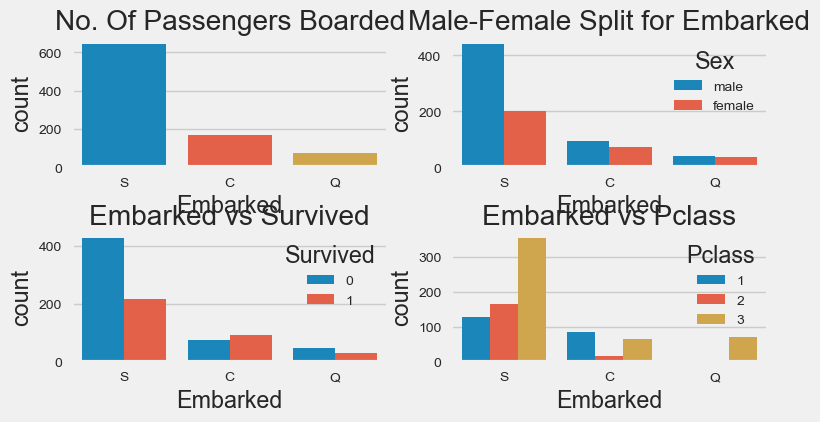

In [184]:
f,ax=plt.subplots(2,2,figsize=(8,4))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

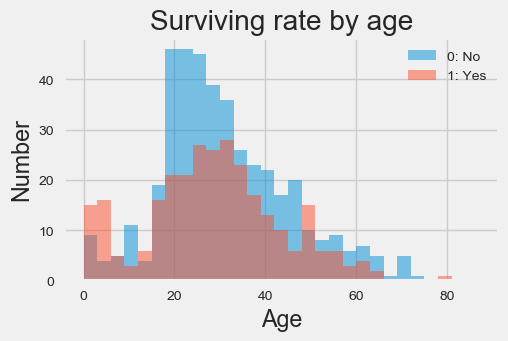

In [25]:
# Age
x=df
d1=x[x['Survived']==0] # Selected data of persons who did not survived
d2=x[x['Survived']==1] # Selected data of persons who did survived

col='Age'
v1=d1[col]
v2=d2[col]
fig, ax = plt.subplots(figsize=(5,3))

n = 3
bins = [z*n for z in range(0,int(90/n))]

rects1 = ax.hist(v1, bins=bins, histtype='stepfilled', alpha=0.5, stacked=False, label='0: No')
rects2 = ax.hist(v2, bins=bins, histtype='stepfilled', alpha=0.5, stacked=True, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Age')
ax.set_title('Surviving rate by age')
ax.legend()

plt.show()

## GroupBy

Basic of grouping data using GroupBuy
 
The group by method is used on categorical variables, groups the data into subsets according to the different categories of that variable

* Pivot Table

In [26]:
df_test = df[["Embarked", "Sex", "Survived"]]
dfg = df_test.groupby(["Embarked", "Sex"],as_index=False).mean() # Average of Survived in each category 
df_pivot = dfg.pivot(index = "Embarked",columns = "Sex")
df_pivot

Survived          
Sex         female      male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603

In [27]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

### Heatmap

Another way to present a pivot table

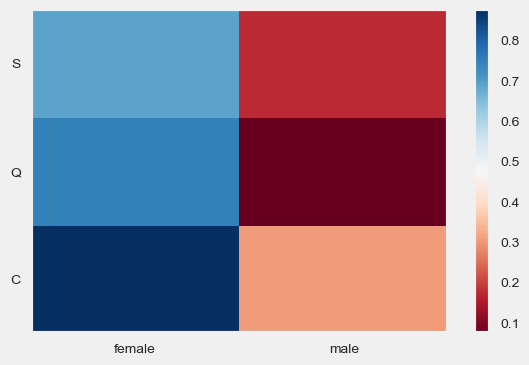

In [28]:
#use the grouped results
#plt.pcolor(df_pivot, cmap='RdBu')
#plt.colorbar()
#plt.show()

fig, ax = plt.subplots(figsize=(6,4))
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
#plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation

Correlation: a measure of the extent of interdependence between variables. <br>
Causation: the relationship between cause and effect between two variables.

### Linear Correlation

In [37]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


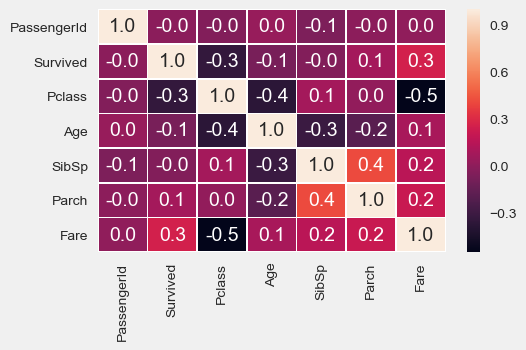

In [38]:
fig,ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

In [39]:
df[["Pclass","Age","Fare","SibSp"]].corr()

,Pclass,Age,Fare,SibSp
Pclass,1.000000,-0.369226,-0.549500,0.083081
Age,-0.369226,1.000000,0.096067,-0.308247
Fare,-0.549500,0.096067,1.000000,0.159651
SibSp,0.083081,-0.308247,0.159651,1.000000


There is a moderate linear correlation between Age and Fare

### Linear Regression

See the correlation between two continuos variables. If the regresion is horizonal, there are not linear correlation between the variables (as the following example)

(0, 84.00723249455339)

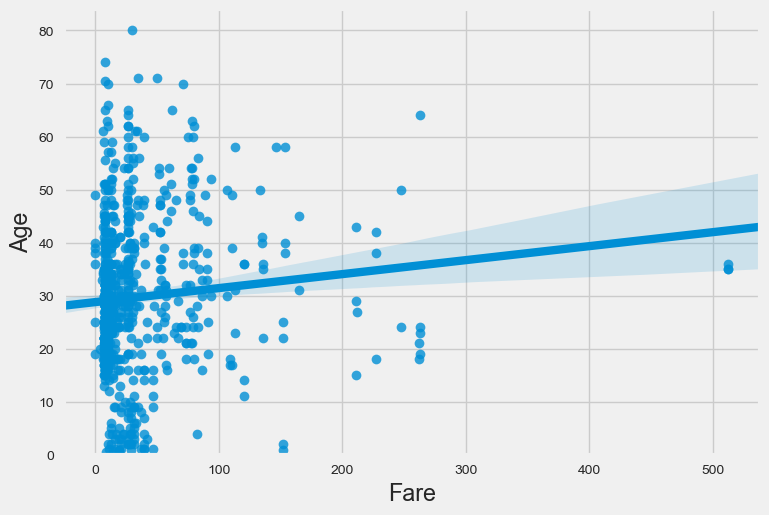

In [40]:
# Linear Correlation between two variables (continue variables)
sns.regplot(x="Fare",y="Age", data=df)
plt.ylim(0,)

### Pearson Correlation

Measure the correlation between two continues variables.
It gives you two values:
* Coeficient value: 
    - +1 Large positive correlation, 
    - -1 Large negative correlation, 
    -  0 no correlation
* p-value: It helps to know if the correlation is due to the chance or not. Smaller p-value means small chances that the correlation is due to the chance and, therrefore, there is a higher statistical significance,
     -     p < 0.001. Strong certainty in the result (correlation value)
     -     p < 0.05. Moderate certainty in the result (correlation value)
     -     p < 0.01. Weak certainty in the result (correlation value)
     -     p > 0.01 No certainty

In [42]:
pearson_coef, p_value = stats.pearsonr(df["Parch"],df["SibSp"])
print("Pearson Coefient between Parch and SibSp = ", pearson_coef)
print("P-Value", p_value)

Pearson Coefient between Parch and SibSp =  0.4148376986201561
P-Value 2.2418236681398336e-38


Which means that "Parch" and "SibSp" have a weak linear correlation and that correlation is statistically significant

In [44]:
pearson_coef, p_value = stats.pearsonr(df["Pclass"],df["Fare"])
print("Pearson Coefient between PClass and Fare = ", pearson_coef)
print("P-Value", p_value)

Pearson Coefient between PClass and Fare =  -0.5494996199439078
P-Value 1.967386173421735e-71


Which means that "PClass" and "Fare" have a moderate linear correlation and that correlation is statistically significant

### ANalysis Of VAriance (ANOVA)

The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. In other words, ANOVA analyzes the difference between different groups of the same variable

It gives you two values:
- F-test score: Variation between sample group means divided by variation within a sample group. In other words, it calculates the ratio variation between group means over the variation within each of the sample group means. We calculate the variation within the means of the groups. If this variation is comparable to the variation of each group, we are going to get a strong correlation between two groups.
- p-value: Confidence degree


In [49]:
df_anova = df[["Sex","Survived"]]
grouped_anova = df_anova.groupby(["Sex"])
f_val, p_val = stats.f_oneway(grouped_anova.get_group("male")["Survived"], grouped_anova.get_group("female")["Survived"])

print("ANOVA RESULTS: F-test score ", f_val, " , p-values ", p_val)

ANOVA RESULTS: F-test score  372.4057236022147  , p-values  1.406066130879677e-69


It shows there is a strong correlation between groups of the categorical variable (male-female), 
which in this case is obvious. Additionally, the correlation is statistically significant.

In [51]:
df_anova_1 = df[["Pclass","Embarked"]]
grouped_anova_1 = df_anova_1.groupby(["Embarked"])
f_val, p_val = stats.f_oneway(grouped_anova_1.get_group("C")["Pclass"], grouped_anova_1.get_group("S")["Pclass"], grouped_anova_1.get_group("Q")["Pclass"])

print("ANOVA RESULTS: F-test score ", f_val, " , p-values ", p_val)

ANOVA RESULTS: F-test score  46.51218940511203  , p-values  6.188928688440989e-20
